# **Aprendizaje no supervisado**
# Feature Selection

## <font color='blue'>**Selección de Características**</font>

En el aprendizaje automático, la selección de características es el proceso de elegir un subconjunto de características de entrada que más contribuyen a la característica de salida para su uso en la construcción de modelos. La selección de características es sustancialmente importante si tenemos conjuntos de datos con alta dimensionalidad (es decir, una gran cantidad de características). No se prefieren los conjuntos de datos de alta dimensión porque tienen un tiempo de entrenamiento prolongado y tienen un alto riesgo de sobreajuste. La selección de características ayuda a mitigar estos problemas al seleccionar características que tienen gran importancia para el modelo, de modo que la dimensionalidad de los datos se puede reducir sin mucha pérdida de la información total. Algunos beneficios de la selección de funciones son:

  1. Reducir el tiempo de formación
  2. Reducir el riesgo de sobreajuste
  3. Aumentar potencialmente el rendimiento del modelo
  4. Reducir la complejidad del modelo para que la interpretación sea más fácil

El objetivo de este notebook es presentar lo fundamental de la selección de características en Python.

Discutiremos tres métodos clave para realizar la selección de características junto con su implementación en Python:
1. Métodos de filtrado (Filter methods)
2. Métodos de envoltura (Wrapper methods)
3. Métodos integrados (Integrated methods)

Antes de comenzar, importemos las bibliotecas de Python necesarias.

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

Haremos algunas demostraciones sobre cómo implementar cada método de selección de características en Python. Para hacer eso, usamos el conjunto de datos de flores de Iris. Importamos el conjunto de datos de flores de Iris de Scikit-learn llamando a lo siguiente:

In [154]:
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Show the first five rows of the dataset
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<a id='section 1.0.'></a>

## <font color='blue'>**Métodos de Filtrado**</font>

En los métodos de filtrado, las características se seleccionan independientemente de cualquier algoritmo de machine learning. Los métodos de filtrado generalmente utilizan un criterio específico, como puntuaciones en pruebas estadísticas y variaciones, para clasificar la importancia de las características individuales. Los métodos de filtrado tienen algunas ventajas:
- Debido a su independencia de la selección de algoritmos de aprendizaje automático, se pueden utilizar como entrada de cualquier modelo de aprendizaje automático.
- Generalmente son efectivos en tiempo de computación.

La principal debilidad de los métodos de filtrado es que no consideran las relaciones entre características. Es por eso que se utilizan principalmente como paso previo al procesamiento de cualquier canal de selección de características. Discutiremos tres tipos de métodos de selección de filtros:
1. Valor F ANOVA
2. Umbral de variación
3. Información mutua

## ANOVA F-value
El método de valor F de ANOVA estima el grado de linealidad entre la característica de entrada (es decir, el predictor) y la característica de salida. Un valor F alto indica un alto grado de linealidad y un valor F bajo indica un grado bajo de linealidad. La principal desventaja de usar el valor F de ANOVA es que solo captura las relaciones lineales entre la característica de entrada y salida. En otras palabras, el valor F no puede detectar ninguna relación no lineal.

Podemos usar Scikit-learn para calcular el valor F de ANOVA. Primero, necesitamos cargar la biblioteca. Scikit-learn tiene dos funciones para calcular el valor F:
- **f_classif**, que calcula el valor F entre la característica de entrada y salida para la tarea de clasificación
- **f_regression**, que calcula el valor F entre la característica de entrada y salida para la tarea de regresion

Usaremos **f_classif** porque el conjunto de datos Iris implica una tarea de clasificación.

In [155]:
# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif

Luego, calculamos el valor F para cada característica de entrada en el conjunto de datos Iris llamando a lo siguiente:

In [156]:
# Create f_classif object to calculate F-value
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


Visualicemos los resultados creando un gráfico de barras:


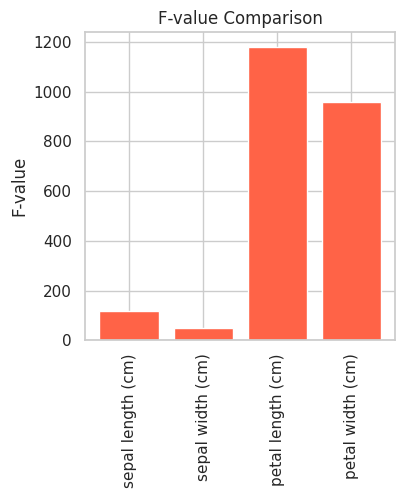

In [157]:
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

## Variance Threshold
El método de umbral de varianza elimina las entidades cuya varianza está por debajo de un valor de corte predefinido. Se basa en la noción de que las características que no varían mucho en sí mismas tienen un poder predictivo bajo. La principal debilidad del umbral de varianza es que no considera la relación de las características de entrada con la característica de salida.

Cabe señalar que, antes de realizar el umbral de varianza, todas las características deben estandarizarse para que tengan la misma escala.

Scikit-learn proporciona la función **VarianceThreshold** para realizar el método de umbral de varianza.

In [158]:
# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold

Luego, realizamos el umbral de varianza llamando a lo siguiente:

In [159]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(feature)

('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


Visualicemos los resultados creando un gráfico de barras:

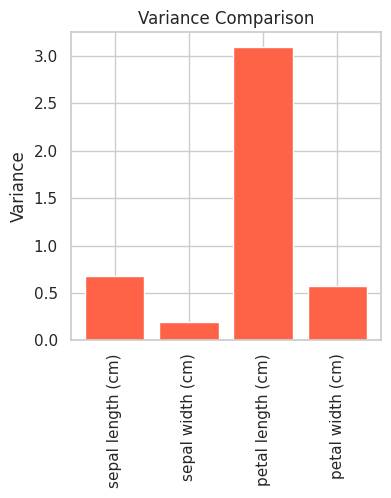

In [160]:
# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

De forma predeterminada, **VarianceThreshold** elimina solo las características de variación cero. La característica de variación cero significa que la característica tiene el mismo valor en todos los casos. Supongamos que queremos eliminar las características que tienen una puntuación de varianza por debajo de 0.2, podemos especificar el parámetro *umbral*.

In [161]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
X_data_new = selector.fit_transform(X_data)

# Print the results
print('Number of features before variance thresholding: {}'.format(X_data.shape[1]))
print('Number of features after variance thresholding: {}'.format(X_data_new.shape[1]))

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


Como podemos ver, **VarianceThreshold** elimina automáticamente las características que tienen una variación por debajo de 0.2. En este caso, elimina **ancho del sépalo**, que tiene una varianza de 0.188.

## Mutual Information
La información mutua (MI) mide la dependencia de una variable a otra cuantificando la cantidad de información obtenida sobre una característica, a través de la otra característica. La información mutua se calcula entre dos variables y mide la reducción de la incertidumbre para una variable dado un valor conocido de la otra variable. MI es simétrico y no negativo, y es cero si y solo si la característica de entrada y salida son independientes. A diferencia del valor F de ANOVA, la información mutua puede capturar relaciones no lineales entre la característica de entrada y salida.

Podemos usar Scikit-learn para calcular MI. Scikit-learn tiene dos funciones para calcular MI:
- **mutual_info_classif**, que calcula el IM para la tarea de clasificación
- **mutual_info_regression**, que calcula el IM para la tarea de regresión

Usaremos **mutual_info_classif** porque el conjunto de datos Iris implica una tarea de clasificación.

### Información mutua.

En la teoría de la probabilidad y la teoría de la información, la información mutua (MI) de dos variables aleatorias es una medida de la dependencia mutua entre las dos variables. Más específicamente, cuantifica la "cantidad de información" (en unidades como shannons, comúnmente llamados bits) obtenida sobre una variable aleatoria mediante la observación de la otra variable aleatoria. El concepto de información mutua está íntimamente ligado al de entropía de una variable aleatoria, una noción fundamental en la teoría de la información que cuantifica la "cantidad de información" esperada contenida en una variable aleatoria.

Sea ${\displaystyle(X, Y)}$  un par de variables aleatorias con valores sobre el espacio ${\displaystyle{\mathcal{X}} \times {\mathcal {Y}}}$. Si su distribución conjunta es ${\displaystyle P_{(X, Y)}}$ y las distribuciones marginales son ${\displaystyle P_{X}}$ , $ {\displaystyle P_{Y }}$ , la información mutua se define como:

$$ I(X;Y) = D_{KL}(P(X,Y)||P_x \otimes P_y)$$


$$ I(X;Y) = \sum_{y\in Y}\sum_{x\in X}(P(X,Y)(x,y)log(\frac{p(X,Y)(x,y)}{p_X(x)p_Y(y)})$$

In [162]:
# Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif

Luego, calculamos MI llamando a lo siguiente:

In [163]:
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


Visualicemos los resultados creando un gráfico de barras:

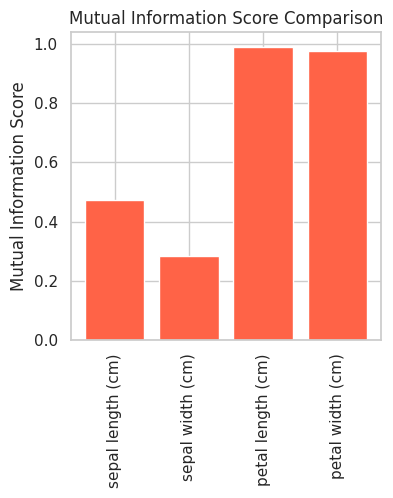

In [164]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

## Uso del objeto selector para seleccionar funciones
Podemos usar **SelectKBest** de Scikit-learn para seleccionar características de acuerdo con las k puntuaciones más altas, determinadas por un método de filtro. Primero, necesitamos importar **SelectKBest**.

In [165]:
# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest

**SelectKBest** tiene dos parámetros importantes:
- *score_func*: la función de filtro que se utiliza para la selección de características
- *k*: el número de funciones principales para seleccionar

Demostremos **SelectKBest** usando el valor F de ANOVA como nuestro método de filtro. Seleccionaremos las dos características principales en función del valor F de ANOVA.

In [166]:
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 4
Number of features after feature selection: 2


Como podemos ver, **SelectKBest** elimina automáticamente dos características que tienen el valor F más bajo.

Podemos identificar el nombre de las funciones seleccionadas llamando al método **get_support**.

In [167]:
# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


Una alternativa de **SelectKBest** es utilizar **SelectPercentile**, que selecciona funciones de acuerdo con un percentil de las puntuaciones más altas.

## <font color='green'>Actividad 1</font>

Utilice los 4 métodos para obtener las variables filtradas. Compare los resultados entrenando un modelo de regresion logistica y vea los cambios.

In [168]:
# Metodo de filtrado 1 - ANOVA F-value
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import f_classif

data = load_breast_cancer()
feature_names = data.feature_names

X_data = pd.DataFrame(load_breast_cancer().data, columns=feature_names)
Y_data = load_breast_cancer().target

('mean radius', 646.9810209786473)
('mean texture', 118.09605934497365)
('mean perimeter', 697.235272476532)
('mean area', 573.0607465682366)
('mean smoothness', 83.65112340843194)
('mean compactness', 313.23307856764205)
('mean concavity', 533.7931262035503)
('mean concave points', 861.6760200073135)
('mean symmetry', 69.52744350046207)
('mean fractal dimension', 0.0934592948710943)
('radius error', 268.84032696734437)
('texture error', 0.03909470231209489)
('perimeter error', 253.89739178268252)
('area error', 243.65158577774116)
('smoothness error', 2.5579678031863895)
('compactness error', 53.24733912812024)
('concavity error', 39.01448155684746)
('concave points error', 113.26275994492413)
('symmetry error', 0.024117406685952966)
('fractal dimension error', 3.468274757042187)
('worst radius', 860.7817069850373)
('worst texture', 149.59690468605072)
('worst perimeter', 897.9442188597807)
('worst area', 661.6002055336272)
('worst smoothness', 122.47288045844209)
('worst compactness'

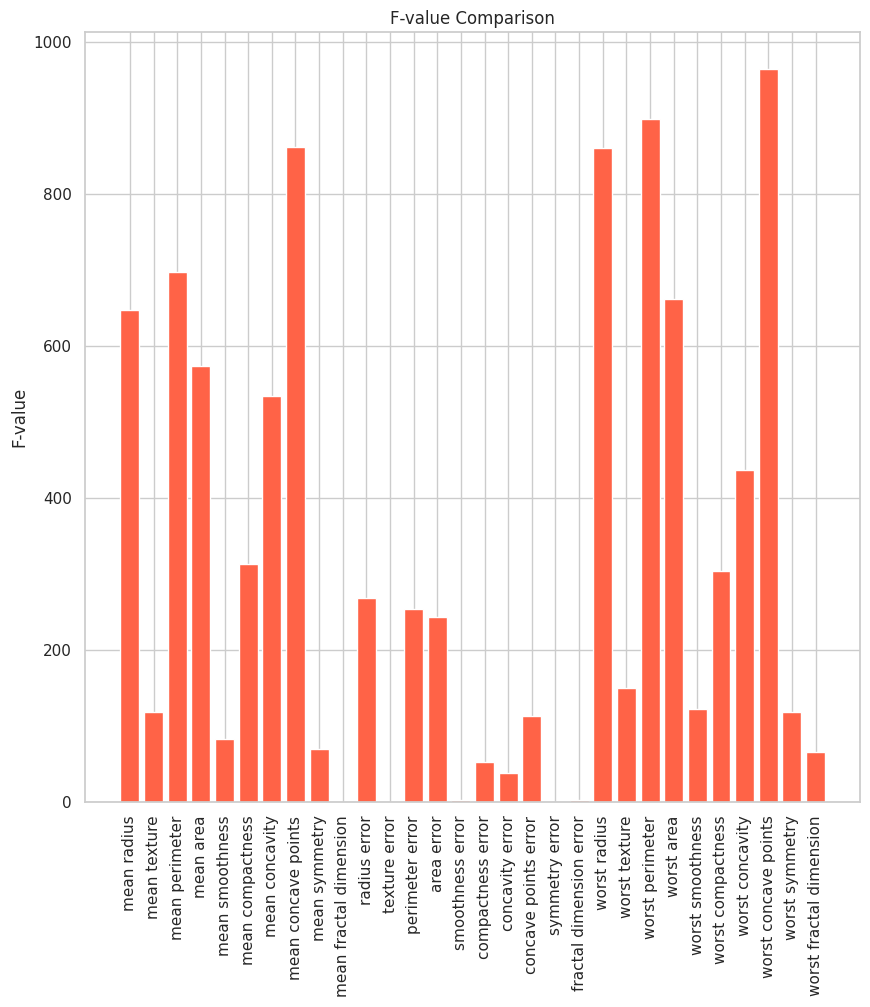

In [169]:
f_value = f_classif(X_data, Y_data)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

# Create a bar chart for visualizing the F-values
plt.figure(figsize=(10,10))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

('mean radius', 12.39709425935181)
('mean texture', 18.46639741599513)
('mean perimeter', 144.71)
('mean area', 2357.5)
('mean smoothness', 0.0001974520733831437)
('mean compactness', 0.002784285489365304)
('mean concavity', 0.006344078747698312)
('mean concave points', 0.0015030146166694059)
('mean symmetry', 0.0007502220077773419)
('mean fractal dimension', 4.976111520102792e-05)
('radius error', 0.07676719835798636)
('texture error', 0.3037811231560935)
('perimeter error', 4.080711486492194)
('area error', 535.398)
('smoothness error', 8.999270217481423e-06)
('compactness error', 0.00032013926130058245)
('concavity error', 0.0009095968349446704)
('concave points error', 3.8005508023387585e-05)
('symmetry error', 6.82128052850776e-05)
('fractal dimension error', 6.9893863052926034e-06)
('worst radius', 23.319169299650056)
('worst texture', 37.519999999999996)
('worst perimeter', 200.79)
('worst area', 4068.8)
('worst smoothness', 0.0005204036289546916)
('worst compactness', 0.0247112

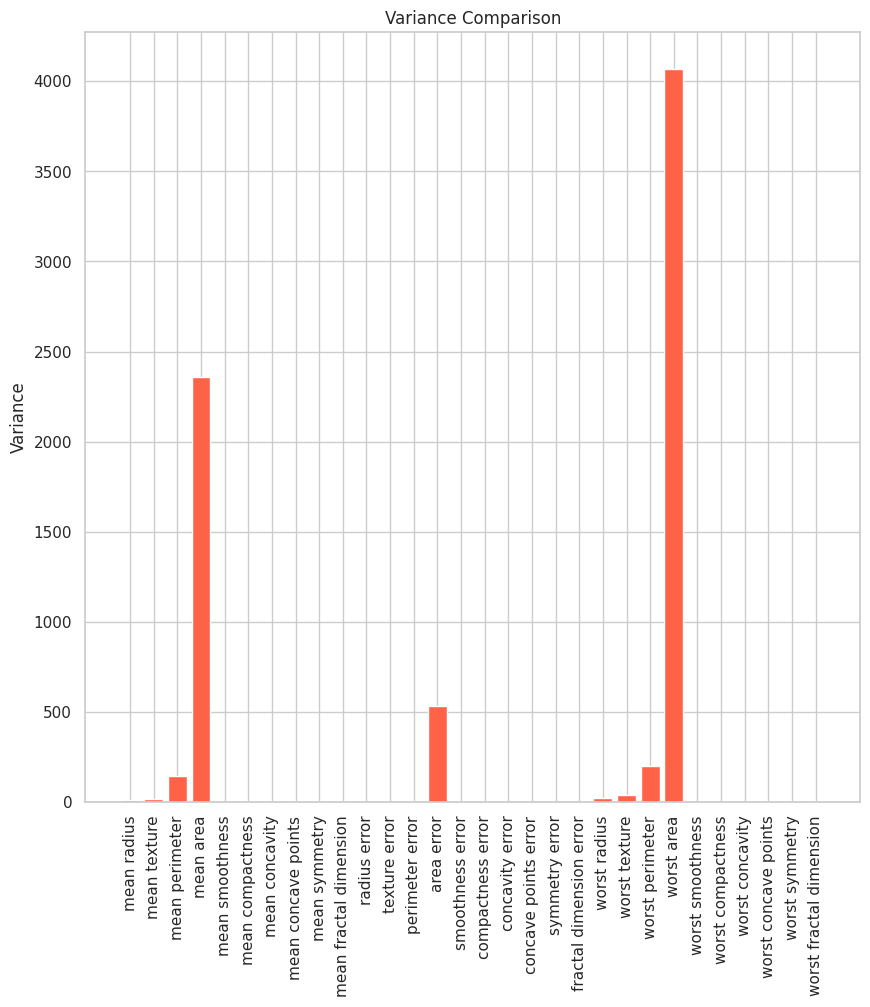

In [170]:
# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(feature)

# Create a bar chart for visualizing the variances
plt.figure(figsize=(10,10))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

('mean radius', 0.36119904808342507)
('mean texture', 0.09493724540317938)
('mean perimeter', 0.40293624681090523)
('mean area', 0.35946772186386133)
('mean smoothness', 0.07587963575822343)
('mean compactness', 0.21617790258088188)
('mean concavity', 0.3746368551183623)
('mean concave points', 0.43741858933158806)
('mean symmetry', 0.0692410004097348)
('mean fractal dimension', 0.009907323993580075)
('radius error', 0.24889281087047932)
('texture error', 0.0013417123312922108)
('perimeter error', 0.27671518250382365)
('area error', 0.3406452844070458)
('smoothness error', 0.015418390136288318)
('compactness error', 0.0751634927784961)
('concavity error', 0.1145094894650085)
('concave points error', 0.12667234778130054)
('symmetry error', 0.018126972190404045)
('fractal dimension error', 0.03812227422895509)
('worst radius', 0.45420269445248374)
('worst texture', 0.11890400769933973)
('worst perimeter', 0.4733873996275295)
('worst area', 0.46328809523445336)
('worst smoothness', 0.1000

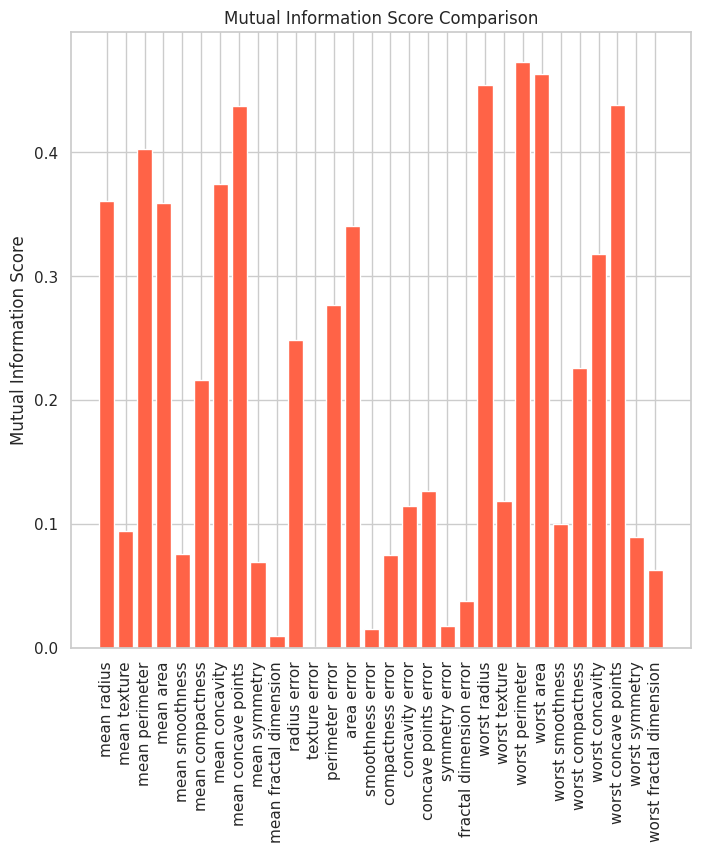

In [171]:
# Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif

X_data = pd.DataFrame(load_breast_cancer().data, columns=feature_names)
Y_data = load_breast_cancer().target

# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, Y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(8,8))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

In [172]:
# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest

# Cantidad de variables de mi importancia para estudiar
defined_k = 4

# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=defined_k)          # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, Y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Number of features before feature selection: 30
Number of features after feature selection: 4
- mean concave points
- worst radius
- worst perimeter
- worst concave points


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

def plot_decision_boundary(X, y, regression):
    # Gráfico de los límites de decisión. Para eso, asignaremos un color a cada
    # punto en la malla [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # tamaño de paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Poner el resultado en un gráfico de color
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plotear los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

# Crear una instancia de clasificador de regresión logística
X = X_data[Y_data<2]            # usaremos solo 2 clases
X = np.array(X)
y = Y_data[Y_data<2]            # usaremos solo 2 clases

logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=4).fit(X, y)
print(logreg.score(X, y))
#plot_decision_boundary(X, y, logreg)


0.7715289982425307


<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Wrapper Methods**</font>

Los métodos de envoltura intentan encontrar un subconjunto de características que produzcan el mejor rendimiento para un modelo al entrenar, evaluar y comparar el modelo con diferentes combinaciones de características. Los métodos de envoltura permiten la detección de relaciones entre características. Sin embargo, pueden ser computacionalmente costosos, especialmente si el número de características es alto. El riesgo de sobreajuste también es alto si el número de instancias en el conjunto de datos es insuficiente.

Hay algunas diferencias entre los métodos de filtro y wrapper:
- Los métodos de filtro no incorporan un modelo de aprendizaje automático para determinar si una característica es buena o mala, mientras que los métodos wrapper  usan un modelo de aprendizaje automático y lo entrenan para decidir si es esencial o no.
- Los métodos de filtrado son mucho más rápidos en comparación con los métodos wrapper, ya que no implican el entrenamiento de los modelos. Por otro lado, los métodos wrapper son computacionalmente costosos y, en el caso de conjuntos de datos masivos, los métodos wrapper no son el método de selección de características más efectivo a considerar.
- Los métodos de filtrado pueden fallar en encontrar el mejor subconjunto de características en situaciones en las que no hay suficientes datos para modelar la correlación estadística de las características, pero los métodos wrapper siempre pueden proporcionar el mejor subconjunto de características debido a su naturaleza exhaustiva.
- El uso de funciones de los métodos wrapper en su modelo final de aprendizaje automático puede llevar a un sobreajuste, ya que los métodos wrapper ya entrenan modelos de aprendizaje automático con las características y afecta el verdadero poder del aprendizaje. Pero las características de los métodos de filtro no conducirán a un sobreajuste en la mayoría de los casos.

Discutiremos tres métodos de envoltura:
1. Selección exhaustiva de funciones (EFS)
2. Selección secuencial hacia adelante (SFS)
3. Selección secuencial hacia atrás (SBS)

Cada uno se discutirá a continuación.

## Exhaustive Feature Selection (EFS)

EFS encuentra el mejor subconjunto de características evaluando todas las combinaciones de características. Supongamos que tenemos un conjunto de datos con tres características. EFS evaluará las siguientes combinaciones de funciones:
- *feature_1*
- *feature_2*
- *feature_3*
- *feature_1* and *feature_2*
- *feature_1* and *feature_3*
- *feature_2* and *feature_3*
- *feature_1*, *feature_2*, and *feature_3*

EFS selecciona un subconjunto que genera el mejor rendimiento (por ejemplo, exactitud, precisión, recuperación, etc.) del modelo que se está considerando.

Mlxtend proporciona la función ** ExhaustiveFeatureSelector ** para realizar EFS.

In [174]:
# Import ExhaustiveFeatureSelector from Mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

EFS tiene cinco parámetros importantes:
- *estimator*: el clasificador que pretendemos entrenar
- *min_features*: el número mínimo de características para seleccionar
- *max_features*: el número máximo de características para seleccionar
- *scoring*: la métrica a usar para evaluar el clasificador
- *cv*: el número de validaciones cruzadas a realizar

En este ejemplo, usamos la regresión logística como nuestro clasificador / estimador.

In [175]:
# Import logistic regression from Scikit-learn
from sklearn.linear_model import LogisticRegression

Luego, realizamos EFS llamando a lo siguiente:

In [177]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=4,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy
          cv=5)                # The number of cross-validations to perform is 5

X_data = pd.DataFrame(load_breast_cancer().data, columns=feature_names)
y_data = load_breast_cancer().target

# Train EFS with our dataset
efs = efs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names
                                                                     # that yield the best score

Features: 31930/31930

Best accuracy score: 0.96
Best subset (indices): (0, 1, 2, 22)
Best subset (corresponding names): ('mean radius', 'mean texture', 'mean perimeter', 'worst perimeter')


Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contiene solo el subconjunto de características que genera la mejor puntuación mediante el método **transform**.

In [178]:
# Transform the dataset
X_data_new = efs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 30
Number of features after transformation: 4


No hay diferencia entre el conjunto de datos antes y después de la transformación porque el subconjunto que produce la mejor puntuación incluye todas las características.

Podemos ver el rendimiento de cada subconjunto de funciones llamando a **get_metric_dict**.

In [ ]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

Visualicemos el rendimiento de cada subconjunto de funciones creando un gráfico de barras horizontales:

In [ ]:
# Create a horizontal bar chart for visualizing
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos,
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

## Sequential Forward Selection (SFS)
SFS encuentra el mejor subconjunto de características agregando una característica que mejor mejora el modelo en cada iteración.

Mlxtend proporciona la función **SequentialFeatureSelector** para realizar SFS.

In [ ]:
# Import SequentialFeatureSelector from Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

EFS tiene cinco parámetros importantes:
- *estimator*: el clasificador que pretendemos entrenar
- *k_features*: el número de funciones para seleccionar. Se puede proporcionar una tupla que contenga un valor mínimo y máximo, y el SFS considerará devolver cualquier combinación de características entre el mínimo y el máximo que obtuvo la puntuación más alta en la validez cruzada.
- *forward*: use SFS si es verdadero y use SBS si es falso
- *scoring*: la métrica a usar para evaluar el clasificador
- *cv*: el número de validaciones cruzadas a realizar

En este ejemplo, usamos la regresión logística como nuestro clasificador / estimador.

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names
                                                                  # that yield the best score

Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contiene solo el subconjunto de características que genera la mejor puntuación mediante el método **transform**.

In [ ]:
# Transform the dataset
X_data_new = sfs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

No hay diferencia entre el conjunto de datos antes y después de la transformación porque el subconjunto que produce la mejor puntuación incluye todas las características.

Podemos ver el rendimiento de cada subconjunto de características consideradas por SFS llamando a **subsets_**.

In [ ]:
# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results

Visualicemos el rendimiento de cada subconjunto de funciones creando un gráfico de barras horizontales:

In [ ]:
# Create a horizontal bar chart for visualizing
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos,
        sfs_results['avg_score'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

## Sequential Backward Selection (SBS)
SBS es lo opuesto a SFS. SBS comienza con todas las características y elimina la característica que tiene la menor importancia para el modelo en cada iteración.

Para realizar el uso de SBS, podemos usar **SequentialFeatureSelector** de Mlxtend. Esta es la misma función que usamos para realizar SFS. La diferencia es que tenemos que establecer el parámetro *k_features* en False.

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SBS object
sbs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=False,      # Set forward to False when we want to perform SBS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy
          cv=5)               # The number of cross-validations to perform is 5

# Train SBS with our dataset
sbs = sbs.fit(X_data.values, y_data)

# Print the results
print('Best accuracy score: %.2f' % sbs.k_score_)   # k_score_ shows the best score
print('Best subset (indices):', sbs.k_feature_idx_) # k_feature_idx_ shows the index of features
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs.k_feature_names_) # k_feature_names_ shows the feature names
                                                                  # that yield the best score

Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contiene solo el subconjunto de características que genera la mejor puntuación mediante el método **transform**.

In [ ]:
# Transform the dataset
X_data_new = sbs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

No hay diferencia entre el conjunto de datos antes y después de la transformación porque el subconjunto que produce la mejor puntuación incluye todas las características.

Podemos ver el rendimiento de cada subconjunto de características consideradas por SFS llamando a **subsets_**.

In [ ]:
# Show the performance of each subset of features considered by SBS
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

Visualicemos el rendimiento de cada subconjunto de funciones creando un gráfico de barras horizontales:

In [ ]:
# Create a horizontal bar chart for visualizing
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos,
        sbs_results['avg_score'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

Comparemos la selección generada por EFS, SFS y SBS.

In [ ]:
# Compare the selection generated by EFS, SFS, and SBS
print('Best subset by EFS:', efs.best_feature_names_)
print('Best subset by SFS:', sfs.k_feature_names_)
print('Best subset by SBS:', sbs.k_feature_names_)

En este escenario simple, seleccionando la mejor combinación de características de las 4 características disponibles en el conjunto Iris, terminamos con resultados similares independientemente de los algoritmos de selección que usamos. En otros casos con un conjunto de datos más grande y un mayor número de características, es muy probable que la selección sea diferente para cada algoritmo de selección.

## <font color='green'>Actividad 2</font>

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Realice los 3 mismos procedimientos con el modelo Gaussian Naive Bayes y obtenga los subconjuntos de mejores características.

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Embedded Methods**</font>

Los métodos integrados combinan los puntos fuertes de los métodos de filtro y wrapper al aprovechar los algoritmos de machine learning que tienen su propio proceso de selección de características integrado. Integran un paso de selección de características como parte del proceso de capacitación (es decir, la selección de características y el proceso de entrenamiento se realizan simultáneamente). Los métodos integrados generalmente tienen un proceso más eficiente que los métodos de envoltura (wrapper) porque eliminan la necesidad de reentrenar cada subconjunto de características que se examinan. Algunos de los algoritmos de machine learning que se pueden utilizar para la selección de características son:
- regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Random Forest
- Máquinas de vectores soporte

En la proxima sección utilizaremos random forest para desarrollar los metodos embedded.

## Feature Selection usando Random Forest
El bosque aleatorio es uno de los algoritmos de aprendizaje más populares utilizados para la selección de características en un flujo de trabajo de ciencia de datos. Como lo explicó Chris Albon:
> "... las estrategias basadas en árboles utilizadas por los bosques aleatorios se clasifican naturalmente según lo bien que mejoran la pureza del nodo. Esto significa una disminución de la impureza en todos los árboles (llamada impureza gini). Los nodos con la mayor disminución de la impureza ocurren al comienzo de los árboles, mientras que las notas con la menor disminución de impurezas ocurren al final de los árboles. Por lo tanto, al podar árboles debajo de un nodo en particular, podemos crear un subconjunto de las características más importantes ".

Para realizar la selección de características usando un clasificador de bosque aleatorio, primero importemos **RandomForestClassifier** de Scikit-learn.

In [ ]:
# Import RandomForestClassifier from Scikit-learn
from sklearn.ensemble import RandomForestClassifier

Necesitamos dividir nuestro conjunto de datos en entrenamiento y prueba porque la selección de características es parte del proceso de entrenamiento.

In [ ]:
# Import train_test_split from Scikit-learn
from sklearn.model_selection import train_test_split

# Split the dataset into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

Tenga en cuenta que usamos el criterio de gini para definir la importancia de la característica. Hay otros criterios de importancia, pero solo limitamos nuestra discusión al criterio de gini.

In [ ]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini') # Use gini criterion to define feature importance

# Train the classifier
rfc.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_names, rfc.feature_importances_):
    print(feature)

Si sumamos todas las puntuaciones de importancia, el resultado es 100%. Como podemos ver, **petal length** y **petal width** corresponden al 83% de la puntuación de importancia total. ¡Son claramente las características más importantes!

## Selector Object for Selecting Features
Podemos usar **SelectFromModel** de Scikit-learn para seleccionar características de acuerdo con un umbral de importancia de características. Primero, necesitamos importar **SelectKBest**.

In [ ]:
from sklearn.feature_selection import SelectFromModel

**SelectFromModel** tiene dos parámetros importantes:
- *estimator*: el algoritmo de aprendizaje automático que se utiliza para seleccionar funciones
- *threshold*: el valor de umbral que se utilizará para la selección de características. Los rasgos cuya importancia es mayor o igual se mantienen mientras que los demás se descartan.

Demostremos **SelectFromModel** mediante un clasificador de bosque aleatorio con importancia de gini. Seleccionaremos características que tengan una importancia superior a 0.2.

In [ ]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini') # Use gini criterion to define feature importance

# Create a SelectFromModel object
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.2) # that have an importance of more than 0.2

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contenga solo las características más importantes mediante el método **transform**.

In [ ]:
# Transform the dataset
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Print the results
print('Number of features before transformation: {}'.format(X_train.shape[1]))
print('Number of features after transformation: {}'.format(X_important_train.shape[1]))

## Comparando Accuracy entre el clasificador con todas las características versus el con características limitadas.

Comparemos la precisión de un clasificador con características completas y un clasificador con características limitadas (es decir, las dos características principales más importantes basadas en un clasificador de bosque aleatorio).

In [ ]:
# Import accuracy_score from Scikit-learn
from sklearn.metrics import accuracy_score

In [ ]:
# Create a random forest classifier
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')

# Train the classifier using dataset with full features
rfc_full.fit(X_train, y_train)

# Make predictions
pred_full = rfc_full.predict(X_test)

# Generate accuracy score
print('The accuracy of classifier with full features: {:.2f}'.format(accuracy_score(y_test, pred_full)))

In [ ]:
# Create a random forest classifier
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')

# Train the classifier with limited features
rfc_lim.fit(X_important_train, y_train)

# Make predictions
pred_lim = rfc_lim.predict(X_important_test)

# Generate accuracy score
print('The accuracy of classifier with limited features: {:.2f}'.format(accuracy_score(y_test, pred_lim)))

Se puede ver que podemos reducir la cantidad de caracteristicas sin reducir significativamente el rendimiento del modelo.

## <font color='green'>Actividad 3</font>

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Realice el mismo procedimiento con RandomForestClassifier y SVM con este conjunto de datos.

<font color='green'>Fin Actividad 3</font>